<a href="https://colab.research.google.com/github/freedomszeto/WeChatCompetition_2021/blob/main/WeChat_Data_competition_Freedom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mount Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Import Data**

In [2]:
data_path='/content/drive/MyDrive/WeChat_Data_Competition'

In [3]:
from os import listdir
filenames =listdir(data_path)

import numpy as np
import pandas as pd

for i in np.arange(len(filenames)):
    if filenames[i][-3:]=='csv':
        vars()['df_'+filenames[i][:-4]] = pd.read_csv(data_path+'/'+filenames[i])
        print('df_'+filenames[i][:-4]+':'+str(len(vars()['df_'+filenames[i][:-4]])))
    else:
        pass

df_test_a:421985
df_feed_embeddings:106444
df_submit_demo_初赛a:421985
df_user_action:7317882
df_feed_info:106444
df_df_submit:421985


# **Data screening**

In [4]:
#Training Data (X) & (Y)
df_user_action.sample(10)

,userid,feedid,date_,device,read_comment,comment,like,play,stay,click_avatar,forward,follow,favorite
1930810,64841,52591,7,1,0,0,0,0,14252,0,0,0,0
3492516,119705,33921,8,2,0,0,0,15562,15777,0,0,0,0
3337995,114782,44769,4,2,0,0,0,7589,10283,0,0,0,0
3986374,136156,36522,9,1,0,0,0,14000,14452,0,0,0,0
5765343,197128,6651,4,2,0,0,0,11209,11683,0,0,0,0
5644228,192894,93048,5,1,0,0,0,1750,2256,0,0,0,0
588242,19986,19969,10,2,0,0,0,23742,24375,0,0,0,0
439328,14587,35681,9,2,0,0,0,2579,3499,0,0,0,0
472603,15808,27970,3,2,0,0,0,56458,56806,0,0,0,0
5126012,175394,67178,14,2,0,0,0,774,2366,0,0,0,0


In [5]:
#Test data (X) -> to predict Y
df_test_a.head(10)

,userid,feedid,device
0,14298,67227,1
1,68356,91864,2
2,49925,104657,2
3,60529,23738,2
4,131482,69038,1
5,52981,33636,1
6,55058,22853,2
7,78168,100222,1
8,135784,78982,2
9,72975,81367,2


In [6]:
#feed_id (X)????
df_feed_embeddings.head(10)

,feedid,feed_embedding
0,46022,-0.02032269 0.06095614 0.11057708 0.03385210 0...
1,73903,-0.07594238 0.01796364 -0.00135112 -0.00333468...
2,88646,-0.05067272 -0.08208735 -0.01929738 -0.0150182...
3,24381,-0.06976026 0.00218324 0.04416835 0.06146711 -...
4,41542,-0.04981736 -0.03523079 0.03022859 0.06672543 ...
5,15622,-0.10077595 -0.01764622 0.03897166 -0.04593844...
6,5662,-0.07481042 -0.07795808 0.00200225 -0.02691050...
7,4282,-0.00903127 0.04316609 0.06915708 0.00960549 0...
8,26337,-0.04625623 -0.01046129 0.08407867 -0.00102488...
9,64025,-0.03590044 0.01959696 0.01913530 0.03326439 0...


In [7]:
#feed info 
df_feed_info.head(2)

,feedid,authorid,videoplayseconds,description,ocr,asr,bgm_song_id,bgm_singer_id,manual_keyword_list,machine_keyword_list,manual_tag_list,machine_tag_list,description_char,ocr_char,asr_char
0,43549,6165,38,104741 122649 8109 117252 65632 23463 118668 4...,139499 59421 82007 142955 27736 83577 52394 11...,142955 27736 83577 103956 32010 34170 89740 90...,19356.0,11703.0,15506;7715;17582,26334;219;25209;7715;18541,81;269;159;6,269 0.8525666;81 0.8525666;8 1.1e-07;306 0.0;2...,26439 5247 6426 3827 1882 26018 20744 22204 30...,25926 8491 13394 2203 26439 6243 33054 16435 1...,2203 26439 6243 33054 16435 16307 17070 24908 ...
1,77432,9386,60,35753 27736 146603 73055 11794 101761 11794 81...,35753 146603 73055 11794 101761 67496 16933 52...,146739 14368 79290 79213 47366 8109 33194 1198...,NaN,NaN,8199;18322;4243,24078;19924,194;267;159;6,267 0.99293476;194 0.99293476,31010 32495 6243 13923 15360 30483 2709 26084 ...,31010 32495 13923 15360 30483 2709 26084 15160...,7259 20851 5061 26207 17573 17531 15117 20072 ...


In [8]:
df_submit_demo_初赛a.head(10)

,userid,feedid,read_comment,like,click_avatar,forward
0,14298,67227,0.880075,0.483832,0.722144,0.563880
1,68356,91864,0.769031,0.929535,0.186520,0.257904
2,49925,104657,0.932616,0.405896,0.142349,0.284657
3,60529,23738,0.143770,0.550933,0.316308,0.159592
4,131482,69038,0.139427,0.051200,0.295990,0.092229
5,52981,33636,0.073550,0.384265,0.085490,0.348019
6,55058,22853,0.188886,0.877843,0.251247,0.670633
7,78168,100222,0.470670,0.266480,0.934919,0.468340
8,135784,78982,0.788318,0.446627,0.961844,0.938570
9,72975,81367,0.958540,0.357957,0.310659,0.145679


# **Freedom's**



## **Data pre-processing**

### **- Feed embeding Data for (X)**

In [9]:
#Data (X) feed embedding
_list_embeddings=[]
_list_embeddings=[x.strip().split(' ') for x in df_feed_embeddings['feed_embedding'].tolist()]
#Convert string to float
_list_embeddings_num=[list(np.float_(lst)) for lst in  _list_embeddings]

In [10]:
#Data Columns (X) feed embedding
_list_Feed_columns=['X_' + str(sub) for sub in np.arange(len(_list_embeddings_num[0]))]

In [11]:
#Create feed embedding data
df_feed_X=pd.DataFrame(data=_list_embeddings_num,columns=_list_Feed_columns)
#Merge on FeedID
df_feed_embeddings_X=pd.merge(df_feed_embeddings['feedid'],df_feed_X, left_index=True, right_index=True)

In [12]:
df_feed_embeddings_X

,feedid,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,X_16,X_17,X_18,X_19,X_20,X_21,X_22,X_23,X_24,X_25,X_26,X_27,X_28,X_29,X_30,X_31,X_32,X_33,X_34,X_35,X_36,X_37,X_38,...,X_472,X_473,X_474,X_475,X_476,X_477,X_478,X_479,X_480,X_481,X_482,X_483,X_484,X_485,X_486,X_487,X_488,X_489,X_490,X_491,X_492,X_493,X_494,X_495,X_496,X_497,X_498,X_499,X_500,X_501,X_502,X_503,X_504,X_505,X_506,X_507,X_508,X_509,X_510,X_511
0,46022,-0.020323,0.060956,0.110577,0.033852,0.028125,-0.085190,0.055592,-0.001098,-0.006469,-0.040490,0.050003,0.030590,0.023775,0.016129,0.006675,-0.019058,0.028737,-0.038177,0.063162,-0.022369,0.041543,-0.019273,-0.065638,0.081566,-0.045814,-0.059316,0.013377,0.070154,-0.015702,-0.018321,-0.014080,-0.077180,-0.008886,-0.012408,0.065398,0.010434,0.045773,0.024244,-0.007295,...,-0.027442,0.008716,0.002703,0.019876,-0.090183,-0.032537,-0.004720,0.033999,-0.046672,-0.068530,0.058420,0.013628,0.015241,0.057415,-0.015635,-0.051328,-0.007046,0.030525,0.076565,0.034216,0.006677,0.001987,0.175590,-0.084504,-0.068579,-0.084344,-0.063360,-0.044166,0.030180,0.083635,0.073053,-0.005482,-0.007490,0.031201,-0.071249,-0.031798,0.040727,-0.011228,0.001824,0.018544
1,73903,-0.075942,0.017964,-0.001351,-0.003335,-0.039069,-0.012011,0.014896,-0.020899,0.100037,-0.073923,0.032253,0.024733,0.006362,0.021023,0.030891,-0.031349,-0.064041,0.033738,-0.005180,-0.012711,0.019486,0.050983,0.005509,-0.024289,0.057363,-0.023029,0.049625,-0.013093,0.094092,-0.020512,0.045075,0.033395,-0.002570,-0.024000,0.059284,0.030325,0.043798,0.011206,-0.055404,...,-0.059543,-0.036542,-0.004397,-0.030557,-0.033170,-0.039639,0.007106,-0.018315,-0.013346,-0.012272,0.005906,0.006817,-0.028856,0.001431,-0.014855,-0.018370,0.030396,0.013597,0.002659,0.074067,0.046170,0.072228,0.140893,0.036249,0.015693,-0.115075,-0.024943,-0.000283,-0.016740,0.100125,0.011751,0.004190,0.064341,0.094825,-0.078081,0.003889,-0.014045,-0.087243,-0.044992,0.014717
2,88646,-0.050673,-0.082087,-0.019297,-0.015018,-0.000390,-0.051599,0.043321,-0.069046,0.032217,-0.015544,-0.043855,-0.044078,-0.035882,0.022807,0.048777,-0.050294,-0.055595,-0.065153,0.016518,-0.036729,0.022894,0.056650,0.002671,0.012963,-0.020440,-0.015135,-0.005572,0.097868,0.025273,-0.002121,0.027417,0.003301,0.032801,0.024886,0.069834,0.024144,-0.006991,-0.057108,-0.082292,...,-0.018050,-0.000946,-0.000946,-0.010450,-0.031935,-0.085231,0.059711,-0.004069,0.026912,-0.048627,0.006784,-0.018839,-0.007815,-0.031992,-0.007566,-0.031945,0.059819,0.007014,-0.002640,0.035705,0.055600,0.069681,0.125612,0.048009,-0.000183,-0.087922,-0.008881,-0.047463,-0.036239,0.077850,0.023434,-0.079689,0.058327,0.034262,-0.009084,-0.025580,-0.008750,-0.003565,0.013552,0.021545
3,24381,-0.069760,0.002183,0.044168,0.061467,-0.088026,0.047818,-0.013436,0.026627,-0.005663,-0.074385,0.021689,0.095473,-0.092355,0.037072,0.045998,-0.077105,0.031543,-0.011524,0.017058,0.004331,0.012519,0.043817,0.032827,-0.036517,-0.040621,0.021726,0.071385,0.066556,-0.020129,0.019313,0.037025,0.003780,0.090548,-0.012768,-0.036623,-0.030930,-0.104636,0.037424,-0.045115,...,-0.039067,0.003861,0.017135,-0.037469,-0.056016,0.009849,0.057969,-0.021531,-0.026605,-0.003749,0.020398,0.055568,-0.069470,0.016425,0.007781,0.019021,-0.001112,0.010756,0.081973,0.044307,0.014545,-0.005362,0.102772,-0.045195,-0.004979,-0.093760,-0.100825,-0.028191,-0.012150,0.090972,-0.006917,-0.066236,0.007459,0.056941,-0.032619,0.013457,-0.038793,-0.032191,-0.058090,0.000727
4,41542,-0.049817,-0.035231,0.030229,0.066725,-0.000301,0.019663,0.022917,-0.035631,0.090847,0.023577,0.012290,-0.008484,0.007685,0.030554,0.011519,0.007034,-0.024760,0.000861,-0.018359,0.028190,-0.012921,0.041417,-0.010652,-0.070672,0.028617,0.077612,0.047797,0.040683,0.136415,-0.013171,0.042443,-0.006521,-0.031452,0.027707,-0.060392,-0.057713,-0.027987,-0.007165,-0.118803,...,-0.054567,0.029274,-0.097623,-0.020445,0.001408,-0.033884,0.005930,-0.048352,0.043976,-0.078387,0.015852,-0.007154,0.039827,0.00847

In [13]:
# To release memory
del _list_embeddings_num 
del _list_embeddings

###----- Check Feed embeding Data

In [14]:
#Check NaN data
df_feed_embeddings_X.isnull().values.any()

False

In [15]:
df_feed_embeddings_X.head(3)

,feedid,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,X_16,X_17,X_18,X_19,X_20,X_21,X_22,X_23,X_24,X_25,X_26,X_27,X_28,X_29,X_30,X_31,X_32,X_33,X_34,X_35,X_36,X_37,X_38,...,X_472,X_473,X_474,X_475,X_476,X_477,X_478,X_479,X_480,X_481,X_482,X_483,X_484,X_485,X_486,X_487,X_488,X_489,X_490,X_491,X_492,X_493,X_494,X_495,X_496,X_497,X_498,X_499,X_500,X_501,X_502,X_503,X_504,X_505,X_506,X_507,X_508,X_509,X_510,X_511
0,46022,-0.020323,0.060956,0.110577,0.033852,0.028125,-0.085190,0.055592,-0.001098,-0.006469,-0.040490,0.050003,0.030590,0.023775,0.016129,0.006675,-0.019058,0.028737,-0.038177,0.063162,-0.022369,0.041543,-0.019273,-0.065638,0.081566,-0.045814,-0.059316,0.013377,0.070154,-0.015702,-0.018321,-0.014080,-0.077180,-0.008886,-0.012408,0.065398,0.010434,0.045773,0.024244,-0.007295,...,-0.027442,0.008716,0.002703,0.019876,-0.090183,-0.032537,-0.004720,0.033999,-0.046672,-0.068530,0.058420,0.013628,0.015241,0.057415,-0.015635,-0.051328,-0.007046,0.030525,0.076565,0.034216,0.006677,0.001987,0.175590,-0.084504,-0.068579,-0.084344,-0.063360,-0.044166,0.030180,0.083635,0.073053,-0.005482,-0.007490,0.031201,-0.071249,-0.031798,0.040727,-0.011228,0.001824,0.018544
1,73903,-0.075942,0.017964,-0.001351,-0.003335,-0.039069,-0.012011,0.014896,-0.020899,0.100037,-0.073923,0.032253,0.024733,0.006362,0.021023,0.030891,-0.031349,-0.064041,0.033738,-0.005180,-0.012711,0.019486,0.050983,0.005509,-0.024289,0.057363,-0.023029,0.049625,-0.013093,0.094092,-0.020512,0.045075,0.033395,-0.002570,-0.024000,0.059284,0.030325,0.043798,0.011206,-0.055404,...,-0.059543,-0.036542,-0.004397,-0.030557,-0.033170,-0.039639,0.007106,-0.018315,-0.013346,-0.012272,0.005906,0.006817,-0.028856,0.001431,-0.014855,-0.018370,0.030396,0.013597,0.002659,0.074067,0.046170,0.072228,0.140893,0.036249,0.015693,-0.115075,-0.024943,-0.000283,-0.016740,0.100125,0.011751,0.004190,0.064341,0.094825,-0.078081,0.003889,-0.014045,-0.087243,-0.044992,0.014717
2,88646,-0.050673,-0.082087,-0.019297,-0.015018,-0.000390,-0.051599,0.043321,-0.069046,0.032217,-0.015544,-0.043855,-0.044078,-0.035882,0.022807,0.048777,-0.050294,-0.055595,-0.065153,0.016518,-0.036729,0.022894,0.056650,0.002671,0.012963,-0.020440,-0.015135,-0.005572,0.097868,0.025273,-0.002121,0.027417,0.003301,0.032801,0.024886,0.069834,0.024144,-0.006991,-0.057108,-0.082292,...,-0.018050,-0.000946,-0.000946,-0.010450,-0.031935,-0.085231,0.059711,-0.004069,0.026912,-0.048627,0.006784,-0.018839,-0.007815,-0.031992,-0.007566,-0.031945,0.059819,0.007014,-0.002640,0.035705,0.055600,0.069681,0.125612,0.048009,-0.000183,-0.087922,-0.008881,-0.047463,-0.036239,0.077850,0.023434,-0.079689,0.058327,0.034262,-0.009084,-0.025580,-0.008750,-0.003565,0.013552,0.021545


In [16]:
df_feed_embeddings_X.tail(3)

,feedid,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,X_16,X_17,X_18,X_19,X_20,X_21,X_22,X_23,X_24,X_25,X_26,X_27,X_28,X_29,X_30,X_31,X_32,X_33,X_34,X_35,X_36,X_37,X_38,...,X_472,X_473,X_474,X_475,X_476,X_477,X_478,X_479,X_480,X_481,X_482,X_483,X_484,X_485,X_486,X_487,X_488,X_489,X_490,X_491,X_492,X_493,X_494,X_495,X_496,X_497,X_498,X_499,X_500,X_501,X_502,X_503,X_504,X_505,X_506,X_507,X_508,X_509,X_510,X_511
106441,66410,-0.006194,0.004365,0.026771,-0.020137,-0.073253,-0.098104,-0.015283,-0.037157,-0.074449,-0.023142,0.002907,0.059261,-0.074697,0.017964,0.001024,-0.044236,-0.062544,0.019082,-0.037372,0.028796,0.004268,0.026641,-0.050764,0.045411,0.013751,0.086901,0.078046,0.035665,0.067252,-0.034432,0.050651,0.000294,0.001212,0.025169,0.045674,-0.028069,0.000176,-0.020752,0.000346,...,-0.010198,-0.012318,0.038839,-0.007358,-0.007505,0.077867,0.041421,-0.010238,-0.002388,-0.029156,0.016238,0.043866,-0.026456,0.044375,0.055156,-0.032129,-0.019800,-0.012852,0.041681,-0.007086,0.056590,-0.053442,0.116056,-0.040261,-0.046709,-0.087885,0.048384,-0.026192,-0.027640,-0.005039,0.031822,-0.001642,0.005780,-0.056018,-0.013198,-0.002852,0.041717,-0.029440,0.040435,0.038833
106442,7919,-0.056616,-0.132325,-0.034051,0.026896,-0.037564,-0.038448,0.042680,0.041747,-0.020963,-0.068147,-0.097938,-0.055873,0.067541,0.019557,0.031695,-0.034589,-0.014413,-0.029950,0.009496,-0.018405,0.066226,-0.017776,0.037486,-0.038148,0.003982,-0.064239,0.015321,0.020589,0.033773,0.002812,0.024638,0.002553,-0.021630,-0.033388,0.013497,0.001530,0.003040,-0.075090,-0.035682,...,-0.068546,0.041760,0.035815,-0.039786,-0.085565,-0.088827,0.073943,-0.036991,0.031913,-0.066685,0.044627,-0.002128,0.021552,0.044172,-0.060671,-0.034037,-0.011568,-0.025932,0.061114,0.037626,0.055031,-0.086923,0.110555,-0.007252,-0.051375,-0.039976,0.023897,0.054094,0.014834,0.083576,-0.019717,-0.008263,0.041563,0.049817,-0.016654,0.017793,0.042140,-0.090922,-0.029644,0.043790
106443,30814,-0.031621,0.012202,-0.034196,0.041800,0.032551,0.008273,0.025489,0.020592,0.063458,-0.048692,-0.042560,-0.075689,0.042015,0.010242,0.006343,-0.024075,-0.000445,0.057938,-0.054409,-0.032302,0.014076,0.054840,-0.013665,-0.014645,-0.023489,-0.003142,-0.049176,0.051081,0.073438,0.026865,0.026982,0.006739,-0.011789,0.007141,0.020885,-0.005423,-0.113116,0.015382,-0.059076,...,-0.061246,-0.019042,0.015585,0.016471,0.029277,-0.097061,-0.007497,0.032778,-0.037261,-0.010602,-0.003544,0.051102,-0.011009,-0.043721,0.060356,-0.019837,-0.031269,0.013458,-0.034135,0.000137,-0.032172,0.039296,0.084269,0.044101,0.029310,-0.166182,0.026453,0.010244,-0.020662,-0.050546,0.003034,-0.074777,0.055233,0.012304,-0.117919,0.033329,-0.011915,-0.060238,0.002613,0.036961


### **- Preparing Training Data (X) + (Y)**

In [17]:
# test data columns
df_test_a.columns

Index(['userid', 'feedid', 'device'], dtype='object')

In [18]:
# Submission data columns
df_submit_demo_初赛a.columns

Index(['userid', 'feedid', 'read_comment', 'like', 'click_avatar', 'forward'], dtype='object')

In [19]:
# Y columns
_list_Ycolumns=df_test_a.columns.append(df_submit_demo_初赛a.columns) ###Combine Y columns
_list_Ycolumns = list(dict.fromkeys(_list_Ycolumns)) ### Remove duplicate items

In [20]:
####Training Data
df_Training_Y=df_user_action[_list_Ycolumns] ###Y data

In [21]:
# df_Training_Y_trim=df_user_action[_list_Ycolumns][df_user_action['date_'].isin([14])] ###Y data

In [22]:
df_user_action['date_'].unique

<bound method Series.unique of 0           1
1           1
2           1
3           1
4           1
           ..
7317877    12
7317878    12
7317879    12
7317880    12
7317881    12
Name: date_, Length: 7317882, dtype: int64>

In [23]:
# df_Training=pd.merge(df_Training_Y,df_feed_embeddings_X,on='feedid',how='left') # Merge with X

In [24]:
df_feed_embeddings_X.head(2)

,feedid,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,X_16,X_17,X_18,X_19,X_20,X_21,X_22,X_23,X_24,X_25,X_26,X_27,X_28,X_29,X_30,X_31,X_32,X_33,X_34,X_35,X_36,X_37,X_38,...,X_472,X_473,X_474,X_475,X_476,X_477,X_478,X_479,X_480,X_481,X_482,X_483,X_484,X_485,X_486,X_487,X_488,X_489,X_490,X_491,X_492,X_493,X_494,X_495,X_496,X_497,X_498,X_499,X_500,X_501,X_502,X_503,X_504,X_505,X_506,X_507,X_508,X_509,X_510,X_511
0,46022,-0.020323,0.060956,0.110577,0.033852,0.028125,-0.085190,0.055592,-0.001098,-0.006469,-0.040490,0.050003,0.030590,0.023775,0.016129,0.006675,-0.019058,0.028737,-0.038177,0.063162,-0.022369,0.041543,-0.019273,-0.065638,0.081566,-0.045814,-0.059316,0.013377,0.070154,-0.015702,-0.018321,-0.014080,-0.077180,-0.008886,-0.012408,0.065398,0.010434,0.045773,0.024244,-0.007295,...,-0.027442,0.008716,0.002703,0.019876,-0.090183,-0.032537,-0.004720,0.033999,-0.046672,-0.068530,0.058420,0.013628,0.015241,0.057415,-0.015635,-0.051328,-0.007046,0.030525,0.076565,0.034216,0.006677,0.001987,0.175590,-0.084504,-0.068579,-0.084344,-0.063360,-0.044166,0.03018,0.083635,0.073053,-0.005482,-0.007490,0.031201,-0.071249,-0.031798,0.040727,-0.011228,0.001824,0.018544
1,73903,-0.075942,0.017964,-0.001351,-0.003335,-0.039069,-0.012011,0.014896,-0.020899,0.100037,-0.073923,0.032253,0.024733,0.006362,0.021023,0.030891,-0.031349,-0.064041,0.033738,-0.005180,-0.012711,0.019486,0.050983,0.005509,-0.024289,0.057363,-0.023029,0.049625,-0.013093,0.094092,-0.020512,0.045075,0.033395,-0.002570,-0.024000,0.059284,0.030325,0.043798,0.011206,-0.055404,...,-0.059543,-0.036542,-0.004397,-0.030557,-0.033170,-0.039639,0.007106,-0.018315,-0.013346,-0.012272,0.005906,0.006817,-0.028856,0.001431,-0.014855,-0.018370,0.030396,0.013597,0.002659,0.074067,0.046170,0.072228,0.140893,0.036249,0.015693,-0.115075,-0.024943,-0.000283,-0.01674,0.100125,0.011751,0.004190,0.064341,0.094825,-0.078081,0.003889,-0.014045,-0.087243,-0.044992,0.014717


In [25]:
# df_Training_Y.memory_usage(deep=True) * 1e-6

In [26]:
df_feed_embeddings_X.memory_usage(deep=True) * 1e-6

Index     0.000128
feedid    0.851552
X_0       0.851552
X_1       0.851552
X_2       0.851552
            ...   
X_507     0.851552
X_508     0.851552
X_509     0.851552
X_510     0.851552
X_511     0.851552
Length: 514, dtype: float64

### **- EDA**

In [27]:
###-----------------Summary-----------------###

In [28]:
df_Training_Y.sample(3)
# len(df_Training_Y)

,userid,feedid,device,read_comment,like,click_avatar,forward
7305565,249869,89552,1,0,0,0,0
435160,14459,107446,2,0,0,0,0
1572169,53437,7645,2,0,0,0,0


In [29]:
print(df_Training_Y['read_comment'].value_counts())
print((df_Training_Y['read_comment'].value_counts()/len(df_Training_Y))*100)
print('-'*50)
print(df_Training_Y['like'].value_counts())
print((df_Training_Y['like'].value_counts()/len(df_Training_Y))*100)
print('-'*50)
print(df_Training_Y['click_avatar'].value_counts())
print((df_Training_Y['click_avatar'].value_counts()/len(df_Training_Y))*100)
print('-'*50)
print(df_Training_Y['forward'].value_counts())
print((df_Training_Y['forward'].value_counts()/len(df_Training_Y))*100)

0    7061640
1     256242
Name: read_comment, dtype: int64
0    96.498413
1     3.501587
Name: read_comment, dtype: float64
--------------------------------------------------
0    7129045
1     188837
Name: like, dtype: int64
0    97.419513
1     2.580487
Name: like, dtype: float64
--------------------------------------------------
0    7262754
1      55128
Name: click_avatar, dtype: int64
0    99.246667
1     0.753333
Name: click_avatar, dtype: float64
--------------------------------------------------
0    7289919
1      27963
Name: forward, dtype: int64
0    99.617881
1     0.382119
Name: forward, dtype: float64


In [30]:
# read_comment
no_user_read_comment= df_Training_Y.groupby('feedid')['read_comment'].agg('count')
no_feed_read_comment= df_Training_Y.groupby('userid')['read_comment'].agg('count')

# like
no_user_like= df_Training_Y.groupby('feedid')['like'].agg('count')
no_feed_like= df_Training_Y.groupby('userid')['like'].agg('count')

# click_avatar
no_user_click_avatar= df_Training_Y.groupby('feedid')['click_avatar'].agg('count')
no_feed_click_avatar= df_Training_Y.groupby('userid')['click_avatar'].agg('count')

# forward
no_user_forward= df_Training_Y.groupby('feedid')['forward'].agg('count')
no_feed_forward= df_Training_Y.groupby('userid')['forward'].agg('count')

In [31]:
print('-'*20+' read_comment no. of users by feed '+'-'*20)
print(no_user_read_comment.describe())
print('-'*20+' read_comment no. of feeds by user '+'-'*20)
print(no_feed_read_comment.describe())

print('-'*20+' like no. of users by feed '+'-'*20)
print(no_user_like.describe())
print('-'*20+' like no. of feeds by user '+'-'*20)
print(no_feed_like.describe())

print('-'*20+' click_avatar no. of users by feed '+'-'*20)
print(no_user_click_avatar.describe())
print('-'*20+' click_avatar no. of feeds by user '+'-'*20)
print(no_feed_click_avatar.describe())

print('-'*20+' forward no. of users by feed '+'-'*20)
print(no_user_forward.describe())
print('-'*20+' forward no. of feeds by user '+'-'*20)
print(no_feed_forward.describe())

-------------------- read_comment no. of users by feed --------------------
count    96564.000000
mean        75.782714
std        193.723214
min          1.000000
25%          5.000000
50%         16.000000
75%         59.000000
max       6841.000000
Name: read_comment, dtype: float64
-------------------- read_comment no. of feeds by user --------------------
count    20000.000000
mean       365.894100
std        242.206111
min          8.000000
25%        157.750000
50%        314.000000
75%        545.000000
max        980.000000
Name: read_comment, dtype: float64
-------------------- like no. of users by feed --------------------
count    96564.000000
mean        75.782714
std        193.723214
min          1.000000
25%          5.000000
50%         16.000000
75%         59.000000
max       6841.000000
Name: like, dtype: float64
-------------------- like no. of feeds by user --------------------
count    20000.000000
mean       365.894100
std        242.206111
min          8.000000

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

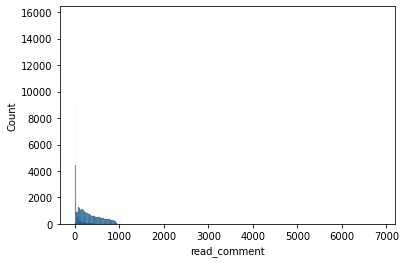

In [33]:
# print('-'*20+' read_comment no. of users by feed '+'-'*20)
sns.histplot(no_user_read_comment)
# print('-'*20+' read_comment no. of feeds by user '+'-'*20)
sns.histplot(no_feed_read_comment)

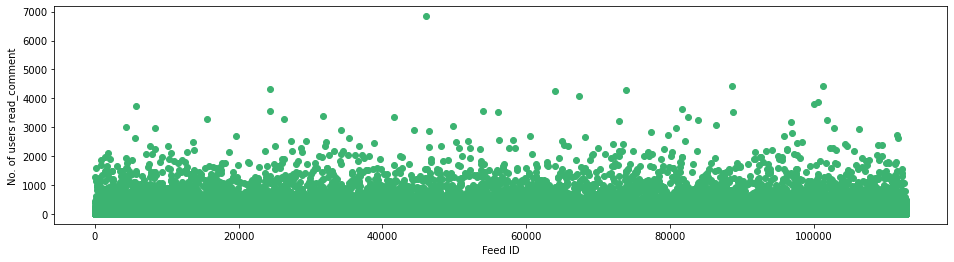

In [34]:
#Let’s visualize the number of users who read_comment.
f,ax = plt.subplots(1,1,figsize=(16,4))
# ratings['rating'].plot(kind='hist')
plt.scatter(no_user_read_comment.index,no_user_read_comment,color='mediumseagreen')
# plt.axhline(y=800,color='r')
plt.xlabel('Feed ID')
plt.ylabel('No. of users read_comment')
plt.show()

In [35]:
# _list_check=[]
# _list_error=[]
# _loop=1
# for i in df_test_a['userid'].unique().tolist():
#   if i in df_Training_Y['userid'].unique().tolist():
#     _list_check.append(i)
#   else:
#     _list_error.append(i)
#   print(_loop)
#   _loop=_loop+1

In [36]:
# len(df_test_a['userid'].unique().tolist())

In [37]:
# len(_list_check)

In [38]:
# len(_list_error)

## **Build Model**

### **- Content-based filtering**

In [ ]:
import matplotlib.pyplot as plt # visualization
import seaborn as sb # visualization
from mpl_toolkits.mplot3d import Axes3D # 3d plot
from termcolor import colored as cl # text customization

from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.cluster import KMeans # K-means algorithm

import seaborn as sns

In [ ]:
# DATA PROCESSING

X = df_feed_embeddings_X.iloc[:,1:].values
X = np.nan_to_num(X)

# sc = StandardScaler()
# cluster_data = sc.fit_transform(X)
# print(cl('Cluster data samples : ', attrs = ['bold']), cluster_data[:5])

In [ ]:
X.shape[0]

106444

In [ ]:
# sse = {}
# for k in np.arange(50,500,50):
#     kmeans = KMeans(n_clusters=k)
#     kmeans.fit(X)
#     sse[k] = kmeans.inertia_ # SSE to closest cluster centroid
#     print(k)
# plt.title('The Elbow Method')
# plt.xlabel('k')
# plt.ylabel('SSE')
# sns.pointplot(x=list(sse.keys()), y=list(sse.values())) 
# plt.show()

In [ ]:
###K-means clustering
# clusters = 200
# model = KMeans(n_clusters=clusters)
# model.fit(X)
# model.labels_.shape

In [ ]:
# Load K-means clustering model:
import pickle
model = pickle.load(open("/content/drive/MyDrive/WeChat_Data_Competition/Freedom's model/contentbased.pkl", "rb"))

In [ ]:
len(model.labels_)

106444

In [ ]:
###Clustering result
df_feed_embeddings_X["Cluster"] = model.labels_
df_feed_embeddings_X.iloc[:,1:].groupby('Cluster').mean().round(2)

,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,X_16,X_17,X_18,X_19,X_20,X_21,X_22,X_23,X_24,X_25,X_26,X_27,X_28,X_29,X_30,X_31,X_32,X_33,X_34,X_35,X_36,X_37,X_38,X_39,...,X_472,X_473,X_474,X_475,X_476,X_477,X_478,X_479,X_480,X_481,X_482,X_483,X_484,X_485,X_486,X_487,X_488,X_489,X_490,X_491,X_492,X_493,X_494,X_495,X_496,X_497,X_498,X_499,X_500,X_501,X_502,X_503,X_504,X_505,X_506,X_507,X_508,X_509,X_510,X_511
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-0.05,0.00,0.02,-0.01,-0.02,-0.04,-0.01,-0.01,0.02,-0.00,0.01,0.03,0.02,0.02,0.02,-0.02,-0.02,0.02,-0.02,-0.02,-0.01,0.02,0.03,-0.03,-0.03,-0.02,-0.00,0.02,0.05,-0.03,0.04,0.01,-0.01,0.04,-0.02,-0.01,0.00,-0.03,-0.03,-0.01,...,0.00,-0.02,-0.01,-0.02,-0.05,0.01,0.02,0.01,-0.00,-0.03,0.05,-0.00,-0.00,-0.01,0.01,-0.01,-0.01,-0.02,0.01,0.01,0.00,-0.00,0.11,-0.01,-0.02,-0.07,0.01,0.00,-0.02,0.09,0.00,-0.02,0.00,0.02,-0.08,0.01,0.02,-0.07,-0.03,0.02
1,0.02,0.00,0.06,-0.01,0.01,-0.04,-0.03,-0.03,0.01,-0.01,0.03,0.03,-0.01,0.02,-0.00,-0.04,-0.07,0.01,0.00,-0.02,-0.00,0.06,-0.00,0.02,0.01,-0.04,0.00,0.07,0.06,-0.02,-0.00,-0.00,-0.05,0.04,0.03,0.01,-0.01,-0.04,-0.04,-0.04,...,-0.00,0.01,0.01,-0.01,-0.08,-0.03,0.03,-0.02,0.06,-0.00,0.03,0.00,-0.02,-0.03,0.01,-0.01,-0.01,0.02,-0.01,0.04,0.01,0.04,0.08,-0.01,-0.03,-0.04,-0.02,-0.03,-0.02,0.05,0.03,-0.05,0.00,0.03,-0.03,-0.01,-0.00,-0.01,-0.05,0.01
2,-0.02,0.02,0.06,0.00,-0.02,-0.04,0.06,-0.04,0.05,0.02,0.02,0.06,0.00,0.02,0.01,-0.01,-0.04,0.01,0.00,-0.01,-0.01,0.04,0.05,-0.04,-0.02,0.04,0.01,0.02,0.04,-0.01,0.03,-0.01,-0.01,0.04,0.04,0.01,-0.02,-0.03,-0.06,-0.00,...,0.02,-0.02,-0.02,-0.01,-0.03,-0.02,0.04,-0.03,0.02,-0.01,0.01,-0.02,-0.01,0.02,0.00,-0.00,0.00,-0.01,0.01,0.03,0.00,-0.00,0.07,0.02,-0.01,-0.08,-0.01,-0.02,-0.02,0.09,-0.00,-0.02,0.03,0.04,-0.06,0.01,0.01,-0.06,-0.05,0.01
3,-0.05,-0.01,0.01,-0.01,0.00,-0.03,0.01,-0.04,-0.00,0.05,-0.02,-0.01,-0.02,0.03,0.01,0.02,-0.06,0.03,-0.00,-0.00,0.02,0.02,-0.00,-0.02,0.01,0.02,-0.01,-0.00,0.05,0.02,0.04,0.01,-0.01,-0.01,-0.04,-0.07,-0.03,-0.03,-0.02,-0.05,...,-0.03,0.00,-0.02,-0.01,-0.06,-0.01,0.03,-0.04,0.03,-0.05,0.04,0.00,0.03,-0.05,0.02,0.01,-0.01,0.03,0.02,0.04,0.01,0.02,0.09,-0.04,0.01,-0.04,-0.00,-0.00,-0.02,0.04,-0.04,0.01,0.02,0.03,-0.10,0.05,-0.01,-0.07,-0.01,-0.00
4,0.01,-0.01,0.04,0.00,0.00,-0.04,0.03,-0.01,0.01,-0.01,0.00,0.03,0.00,0.03,0.02,-0.01,-0.02,0.01,-0.01,-0.01,-0.00,0.04,-0.02,-0.03,0.01,-0.01,-0.02,0.04,0.05,-0.01,0.04,-0.00,-0.01,0.02,-0.01,0.01,-0.01,-0.01,-0.04,-0.01,...,-0.01,0.00,-0.00,-0.02,-0.05,-0.03,0.03,-0.02,0.02,-0.04,0.03,-0.01,-0.00,-0.01,0.01,-0.01,-0.00,0.01,0.03,0.01,0.01,0.00,0.09,-0.00,0.00,-0.06,-0.01,0.00,-0.01,0.04,0.00,-0.02,0.01,0.03,-0.06,0.01,0.00,-0.05,-0.01,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.01,0.01,0.01,0.01,-0.01,-0.04,0.01,-0.02,0.01,-0.00,-0.02,0.02,-0.02,0.03,0.02,-0.01,-0.02,0.01,-0.01,-0.02,0.00,0.05,-0.03,-0.01,0.02,0.03,-0.01,0.01,0.04,-0.01,0.03,-0.00,-0.01,-0.00,-0.02,-0.01,-0.01,-0.03,-0.03,-0.02,...,-0.02,-0.00,-0.00,-0.02,-0.04,0.01,0.02,-0.03,0.03,-0.03,0.05,0.01,-0.00,0.00,0.01,-0.01,-0.01,0.01,0.03,0.01,-0.00,0.03,0.08,-0.01,0.00,-0.07,-0.01,0.00,-0.01,0.04,0.00,-0.02,0.00,0.03,-0.05,0.01,0.00,-0.06,-0.02,0.01
196,-0.00,-0.00,0.05,0.03,-0.01,-0.03,0.02,-0.02,-0.02,-0.02,0.01,0.05,-0.02,0.02,0.01,-0.00,-0.02,-0.00,-0.01,-0.03,0.02,0.01,-0.02,0.00,0.04,-0.01,-0.01,-0.01,0.07,-0.01,0.03,0.01,0.00,0.03,0.03,0.02,0.00,-0.00,-0.08,-0.05,...,-0.01,-0.02,-0.01,-0.02,-0.07,-0.05,0.02,-0.01,-0.01,-0.06,0.02,0.00,-0.00,-0.02,0.01,-0.02,-0.01,-0.01,0.02,0.05,0.00,0.01,0.11,-0.04,-0.01,-0.05,-0.05,0.00,-0.02,0.02,0.01,-0.05,-0.01,0.02,-0.08,0.00,-0.01,-0.09,-0.04,0.02
19

In [ ]:
####Group by feedid and Cluster
df_feed_cluster=df_feed_embeddings_X.groupby('feedid')['Cluster'].min()

In [ ]:
###Merge Cluster with training Y
df_Training_Y_cluster=pd.merge(df_Training_Y,df_feed_cluster,on='feedid')

In [ ]:
df_Training_Y_cluster

,userid,feedid,device,read_comment,like,click_avatar,forward,Cluster
0,8,71474,1,0,1,0,0,175
1,273,71474,2,0,1,0,0,175
2,284,71474,1,0,0,0,0,175
3,756,71474,2,0,0,0,0,175
4,1399,71474,2,0,0,0,0,175
...,...,...,...,...,...,...,...,...
7317877,249869,71428,1,0,0,0,0,75
7317878,250089,74673,2,0,0,0,0,189
7317879,250141,88906,1,0,0,0,0,132
7317880,250141,19521,1,0,0,0,0,28


In [ ]:
###Average the Y by clusters
df_result_bycluster=df_Training_Y_cluster.groupby('Cluster', as_index=False)['read_comment','like','click_avatar','forward'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [ ]:
df_result_bycluster

,Cluster,read_comment,like,click_avatar,forward
0,0,0.034274,0.037334,0.004456,0.001200
1,1,0.011425,0.020263,0.004541,0.013378
2,2,0.052778,0.013160,0.002439,0.002393
3,3,0.028749,0.017210,0.009987,0.002246
4,4,0.042996,0.019439,0.009781,0.003707
...,...,...,...,...,...
195,195,0.030914,0.022048,0.007153,0.002418
196,196,0.039739,0.017909,0.010503,0.004017
197,197,0.031079,0.013942,0.031196,0.001220
198,198,0.022724,0.025830,0.019454,0.000817


In [ ]:
df_output_contentbase=pd.merge(df_test_a,df_feed_cluster,how='left',on='feedid')
df_output_contentbase=pd.merge(df_output_contentbase,df_result_bycluster,how='left',on='Cluster')

In [ ]:
### Keep variables needed
df_finaloutput_contentbase=df_output_contentbase[['userid', 'feedid', 'read_comment', 'like','click_avatar', 'forward']]

In [ ]:
### Output csv
df_finaloutput_contentbase.to_csv('df_finaloutput_contentbase.csv')

In [ ]:
df_finaloutput_contentbase

,userid,feedid,read_comment,like,click_avatar,forward
0,14298,67227,0.015822,0.016664,0.004051,0.009923
1,68356,91864,0.039851,0.012491,0.011083,0.001939
2,49925,104657,0.060025,0.037458,0.005987,0.003408
3,60529,23738,0.074352,0.047100,0.009854,0.001792
4,131482,69038,0.044446,0.025909,0.003245,0.001655
...,...,...,...,...,...,...
421980,133812,56450,0.045847,0.015296,0.001689,0.000946
421981,231669,76501,0.049547,0.091638,0.004997,0.001817
421982,179168,70550,0.025858,0.017226,0.010980,0.006803
421983,92546,49432,0.015821,0.015548,0.005001,0.000273


In [ ]:
# Save model:
# import pickle
# pickle.dump(model, open("/content/drive/MyDrive/WeChat_Data_Competition/Freedom's model/contentbased.pkl", "wb"))

### **- Collaborative filtering approch**


In [39]:
!pip install scikit-surprise

     |████████████████████████████████| 11.8MB 254kB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1617631 sha256=c32c7f630ae6f970a26920eb5ff6e3d87fd8f1356ae88a97815b94096b0817da
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [40]:
from surprise import Dataset
from surprise import KNNBasic, BaselineOnly
from surprise.model_selection import cross_validate

from surprise import SVD
from surprise import Reader

In [ ]:
reader = Reader(rating_scale=(0, 1))
data_read_comment = Dataset.load_from_df(df_user_action[["userid", "feedid", "read_comment"]], reader)

algo = SVD()

cross_validate(algo, data_read_comment, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.1611  0.1609  0.1611  0.1613  0.1610  0.1611  0.0001  
MAE (testset)     0.0593  0.0592  0.0592  0.0592  0.0593  0.0593  0.0001  
Fit time          368.57  370.50  368.95  373.99  364.54  369.31  3.06    
Test time         26.39   27.70   25.33   24.79   26.87   26.22   1.05    


{'fit_time': (368.5724666118622,
  370.502925157547,
  368.9539957046509,
  373.98769307136536,
  364.536434173584),
 'test_mae': array([0.05933431, 0.05917907, 0.05921686, 0.05924663, 0.05934616]),
 'test_rmse': array([0.16111093, 0.1608903 , 0.16109487, 0.16126394, 0.16101673]),
 'test_time': (26.394469022750854,
  27.704406261444092,
  25.333077907562256,
  24.786016702651978,
  26.871339082717896)}

In [ ]:
# Save model:
# import pickle
# pickle.dump(algo, open("/content/drive/MyDrive/WeChat_Data_Competition/Freedom's model/SVD_read_comment.pkl", "wb"))

In [ ]:
# Load K-means clustering model:
# import pickle
# algo = pickle.load(open("/content/drive/MyDrive/WeChat_Data_Competition/Freedom's model/SVD_read_comment.pkl", "rb"))

In [ ]:
###Loop for training
for _var in ["read_comment","like","click_avatar","forward"]:
  reader = Reader(rating_scale=(0, 1))
  data=Dataset.load_from_df(df_user_action[["userid", "feedid", _var]], reader)
  algo = SVD()
  cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
  # Save model:
  import pickle
  pickle.dump(algo, open("/content/drive/MyDrive/WeChat_Data_Competition/Freedom's model/SVD_"+_var+".pkl", "wb"))

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.1482  0.1485  0.1478  0.1480  0.1480  0.1481  0.0003  
MAE (testset)     0.0494  0.0493  0.0492  0.0493  0.0494  0.0493  0.0001  
Fit time          374.77  381.87  383.41  375.08  371.93  377.41  4.43    
Test time         27.94   24.81   29.50   25.08   27.00   26.86   1.76    
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.0871  0.0874  0.0872  0.0868  0.0867  0.0870  0.0003  
MAE (testset)     0.0217  0.0217  0.0217  0.0216  0.0217  0.0217  0.0000  
Fit time          374.08  371.71  380.22  364.00  371.44  372.29  5.21    
Test time         30.55   24.71   28.63   27.33   27.73   27.79   1.90    
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset

In [41]:
###Loop for loading model

import pickle
algo_read_comment = pickle.load(open("/content/drive/MyDrive/WeChat_Data_Competition/Freedom's model/SVD_read_comment.pkl", "rb"))
algo_like = pickle.load(open("/content/drive/MyDrive/WeChat_Data_Competition/Freedom's model/SVD_like.pkl", "rb"))
algo_click_avatar = pickle.load(open("/content/drive/MyDrive/WeChat_Data_Competition/Freedom's model/SVD_click_avatar.pkl", "rb"))
algo_forward = pickle.load(open("/content/drive/MyDrive/WeChat_Data_Competition/Freedom's model/SVD_forward.pkl", "rb"))

In [42]:
_list_read_comment=[]
_list_like=[]
_list_click_avatar=[]
_list_forward=[]

for i in np.arange(len(df_test_a)):
  _list_read_comment.append(algo_read_comment.predict(df_test_a['userid'][i],df_test_a['feedid'][i]).est)
  _list_like.append(algo_like.predict(df_test_a['userid'][i],df_test_a['feedid'][i]).est)
  _list_click_avatar.append(algo_click_avatar.predict(df_test_a['userid'][i],df_test_a['feedid'][i]).est)
  _list_forward.append(algo_forward.predict(df_test_a['userid'][i],df_test_a['feedid'][i]).est)

In [43]:
df_submit=df_test_a[['userid','feedid']]
df_submit['read_comment']=_list_read_comment
df_submit['like']=_list_like
df_submit['click_avatar']=_list_click_avatar
df_submit['forward']=_list_forward

In [44]:
df_submit.to_csv('/content/drive/MyDrive/WeChat_Data_Competition/df_submit.csv', index=False)

In [45]:
df_submit

,userid,feedid,read_comment,like,click_avatar,forward
0,14298,67227,0.000000,0.005217,0.038026,0.002133
1,68356,91864,0.000000,0.000000,0.000000,0.005280
2,49925,104657,0.000058,0.004043,0.005230,0.002371
3,60529,23738,0.144310,0.000000,0.000000,0.057146
4,131482,69038,0.007110,0.025463,0.017848,0.000000
...,...,...,...,...,...,...
421980,133812,56450,0.041344,0.041750,0.000000,0.001493
421981,231669,76501,0.000000,0.000000,0.009910,0.000000
421982,179168,70550,0.049184,0.054040,0.003738,0.000000
421983,92546,49432,0.005394,0.003576,0.019855,0.017377


### **- XGBoost**
https://medium.com/the-innovation/multi-label-classification-example-with-multioutputclassifier-and-xgboost-in-python-98c84c7d379f

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import xgboost as xgb
import matplotlib.pyplot as plt # visualization
import seaborn as sns


from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score
# import optuna

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

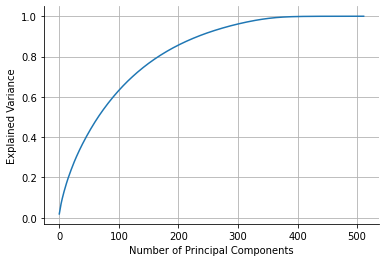

In [ ]:
# Before we perform PCA, we need to normalise the features so that they have zero mean and unit variance
# scaler = StandardScaler()
# scaler.fit(df_feed_embeddings_X.iloc[:,1:])
# df_train_x_norm = scaler.transform(df_feed_embeddings_X.iloc[:,1:])

pca = PCA()
comp = pca.fit(df_feed_embeddings_X.iloc[:,1:])

# We plot a graph to show how the explained variation in the 129 features varies with the number of principal components
plt.plot(np.cumsum(comp.explained_variance_ratio_))
plt.grid()
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance')
sns.despine();

In [ ]:
# Using the first X principal components, we apply the PCA mapping
# From here on, we work with only X features instead of the full set of 512 features
pca = PCA(n_components=150).fit(df_feed_embeddings_X.iloc[:,1:])
train_x_transform = pca.transform(df_feed_embeddings_X.iloc[:,1:])

In [ ]:
_list_XPCA_columns=['X_PCA_' + str(sub) for sub in np.arange(len(train_x_transform[0]))]

In [ ]:
df_train_x_transform=pd.DataFrame(data=train_x_transform)
df_train_x_transform.columns=_list_XPCA_columns

df_train_x_transform['feedid']=df_feed_embeddings_X['feedid']
df_train_x_transform

,X_PCA_0,X_PCA_1,X_PCA_2,X_PCA_3,X_PCA_4,X_PCA_5,X_PCA_6,X_PCA_7,X_PCA_8,X_PCA_9,X_PCA_10,X_PCA_11,X_PCA_12,X_PCA_13,X_PCA_14,X_PCA_15,X_PCA_16,X_PCA_17,X_PCA_18,X_PCA_19,X_PCA_20,X_PCA_21,X_PCA_22,X_PCA_23,X_PCA_24,X_PCA_25,X_PCA_26,X_PCA_27,X_PCA_28,X_PCA_29,X_PCA_30,X_PCA_31,X_PCA_32,X_PCA_33,X_PCA_34,X_PCA_35,X_PCA_36,X_PCA_37,X_PCA_38,X_PCA_39,...,X_PCA_111,X_PCA_112,X_PCA_113,X_PCA_114,X_PCA_115,X_PCA_116,X_PCA_117,X_PCA_118,X_PCA_119,X_PCA_120,X_PCA_121,X_PCA_122,X_PCA_123,X_PCA_124,X_PCA_125,X_PCA_126,X_PCA_127,X_PCA_128,X_PCA_129,X_PCA_130,X_PCA_131,X_PCA_132,X_PCA_133,X_PCA_134,X_PCA_135,X_PCA_136,X_PCA_137,X_PCA_138,X_PCA_139,X_PCA_140,X_PCA_141,X_PCA_142,X_PCA_143,X_PCA_144,X_PCA_145,X_PCA_146,X_PCA_147,X_PCA_148,X_PCA_149,feedid
0,0.032824,0.147650,0.027671,0.042131,-0.046745,0.032873,-0.033968,-0.047743,0.055329,-0.075841,-0.070241,0.000086,-0.046120,0.098745,-0.077766,-0.012216,0.052703,-0.001807,-0.044344,0.053649,-0.091691,-0.043492,0.067769,0.132315,0.137778,0.024987,-0.039559,0.027191,0.110691,-0.057892,0.000792,0.105674,0.203191,-0.068678,0.031338,-0.034306,-0.091843,-0.056403,0.062153,-0.196483,...,0.026934,-0.034012,-0.067594,0.068944,0.001021,0.022512,0.061108,-0.125071,0.059057,-0.043048,0.029822,-0.070421,0.017939,-0.047442,-0.012743,0.038884,0.008675,0.066961,-0.013023,0.018884,0.064150,0.019021,-0.014113,0.015164,0.028044,0.038648,-0.031671,0.007470,-0.029484,0.013175,-0.021367,-0.023334,0.049634,-0.015044,0.061677,-0.020952,-0.002198,0.000353,-0.002394,46022
1,-0.083454,0.173488,0.066648,-0.153014,-0.064138,0.015413,0.079169,0.062012,0.135647,-0.017508,-0.060908,-0.015832,-0.049439,-0.056849,-0.009308,-0.019577,0.044739,0.049919,-0.088686,0.032494,0.019746,-0.055404,0.018306,-0.091482,-0.032985,0.058356,0.015989,-0.006403,0.020029,-0.010650,0.048531,-0.088776,-0.028432,0.060572,0.049995,-0.040894,-0.032731,-0.052884,0.053293,-0.092409,...,-0.085440,0.061377,0.068009,0.054024,0.085220,0.046435,-0.024714,-0.018720,0.037848,0.004700,0.093875,-0.005134,0.005930,0.047657,-0.003281,-0.012776,0.029623,0.065559,0.027588,-0.050722,0.005530,-0.049887,-0.027781,0.029112,0.040323,-0.056524,0.118830,0.037521,-0.000301,0.006087,0.012428,0.006488,0.003552,0.147820,-0.037000,-0.014600,-0.040038,-0.037224,0.051486,73903
2,0.033182,0.279640,-0.050894,-0.143515,-0.142544,-0.042301,-0.065685,0.052558,0.097374,-0.026905,0.060216,-0.091539,0.040382,0.063002,0.013542,0.007769,0.027873,0.046357,-0.040919,-0.120767,0.029194,0.071202,0.034777,0.008807,0.091458,0.035828,-0.104902,-0.041693,-0.018118,0.002850,0.054748,-0.069068,0.019816,0.072910,0.086640,0.018186,-0.018676,0.033983,0.045339,0.018582,...,-0.016094,0.073310,0.053578,0.043220,-0.006487,0.022293,-0.033811,-0.006589,0.062835,-0.050230,-0.012640,-0.045352,-0.035802,-0.022370,0.060252,0.088868,0.084035,0.026065,-0.003779,-0.005794,-0.088287,0.001488,0.022882,-0.020001,-0.027292,0.054379,-0.066096,0.015833,0.057959,-0.028220,0.050530,-0.014650,-0.017098,0.017485,-0.037300,0.028387,0.038340,0.050055,0.048317,88646
3,-0.144183,0.052449,-0.052795,-0.091441,0.162954,-0.038065,-0.071868,0.051166,0.136610,-0.048354,0.137794,0.010622,-0.037138,-0.030432,0.018487,-0.018027,-0.013502,-0.141957,0.047012,0.056995,-0.074256,0.046414,0.077286,0.033921,-0.005747,-0.025570,0.049771,-0.010868,0.003148,0.041062,0.035453,0.023561,0.095535,-0.038911,-0.015173,0.091597,0.048223,-0.092684,0.045340,0.161979,...,-0.005939,0.043031,0.042595,0.012488,0.019012,0.017423,0.101244,-0.035893,0.005644,0.009473,-0.016158,-0.004509,0.064601,-0.050553,-0.027461,-0.001374,-0.061667,0.024697,0.043734,-0.077714,0.022586,-0.025968,0.006348,-0.048081,-0.047395,-0.080222,0.076825,0.035027,0.009408,-0.055412,-0.064265,0.063350,0.023377,0.008558,0.041209,0.045732,-0.029389,-0.014387,-0.026730,24381
4,-0.080029,0.040433,-0.005281,-0.152707,-0.023998,-0.062313,0.048988,0.035085,-0.038836,0.012231,0.028476,0.105894,0.011864,-0.018364,-0.030297,-0.004300,0.004870,0.001382,-0.041150,-0.044366,0.174097,-0.087894,0.

In [ ]:
#Release space
del df_feed_embeddings_X
del train_x_transform

In [ ]:
# !!!!!!Merge with X!!!!!!
df_Training=pd.merge(df_Training_Y_trim,df_train_x_transform,on='feedid',how='left') 
# df_Training=pd.merge(df_Training_Y,df_train_x_transform,on='feedid',how='left') 

In [ ]:
df_Training

,userid,feedid,device,read_comment,like,click_avatar,forward,X_PCA_0,X_PCA_1,X_PCA_2,X_PCA_3,X_PCA_4,X_PCA_5,X_PCA_6,X_PCA_7,X_PCA_8,X_PCA_9,X_PCA_10,X_PCA_11,X_PCA_12,X_PCA_13,X_PCA_14,X_PCA_15,X_PCA_16,X_PCA_17,X_PCA_18,X_PCA_19,X_PCA_20,X_PCA_21,X_PCA_22,X_PCA_23,X_PCA_24,X_PCA_25,X_PCA_26,X_PCA_27,X_PCA_28,X_PCA_29,X_PCA_30,X_PCA_31,X_PCA_32,...,X_PCA_110,X_PCA_111,X_PCA_112,X_PCA_113,X_PCA_114,X_PCA_115,X_PCA_116,X_PCA_117,X_PCA_118,X_PCA_119,X_PCA_120,X_PCA_121,X_PCA_122,X_PCA_123,X_PCA_124,X_PCA_125,X_PCA_126,X_PCA_127,X_PCA_128,X_PCA_129,X_PCA_130,X_PCA_131,X_PCA_132,X_PCA_133,X_PCA_134,X_PCA_135,X_PCA_136,X_PCA_137,X_PCA_138,X_PCA_139,X_PCA_140,X_PCA_141,X_PCA_142,X_PCA_143,X_PCA_144,X_PCA_145,X_PCA_146,X_PCA_147,X_PCA_148,X_PCA_149
0,8,42455,1,0,0,0,0,-0.077585,-0.006395,-0.212722,-0.037330,0.163927,-0.013163,0.006674,0.059219,0.156449,0.032639,0.042919,-0.136180,-0.072070,-0.062655,0.050071,-0.089696,-0.039211,-0.043621,0.011827,0.014348,-0.021640,0.063505,0.126132,-0.041632,-0.036651,-0.010252,0.032542,0.000985,0.044293,-0.064160,-0.019448,0.008130,0.046712,...,-0.037569,0.056586,-0.021052,-0.122332,0.003740,-0.019069,-0.036820,0.024262,-0.083487,-0.042508,0.005793,0.040900,-0.014840,0.030670,0.018444,-0.013905,-0.044453,-0.000990,0.080478,0.037172,-0.025520,-0.009231,-0.007215,-0.017517,-0.022978,0.059172,-0.026924,-0.043032,-0.029413,0.114592,0.045722,-0.019464,0.014064,0.029099,0.056916,-0.039636,0.016446,0.037480,-0.068401,-0.008717
1,8,28217,1,0,0,0,0,-0.051526,0.000767,-0.070942,0.052418,-0.094546,-0.104850,0.035019,0.125608,-0.054704,0.027956,0.035852,0.010875,0.031843,0.056490,0.070648,0.030854,0.042835,0.006573,0.003889,-0.087823,0.086194,0.023899,0.100734,-0.058232,0.057450,-0.072095,-0.039389,0.011592,-0.011057,0.033944,0.038483,-0.176299,-0.019050,...,0.040887,0.047396,0.060566,-0.022398,0.036110,-0.059670,-0.009944,0.041408,0.065786,0.054004,0.012898,0.033639,0.023915,-0.007223,0.001509,0.014379,-0.030115,-0.005199,0.035119,-0.027484,-0.065358,0.100510,0.026666,0.110775,0.040883,-0.066430,-0.094679,-0.013002,-0.074088,0.001657,-0.021129,-0.058628,-0.048864,0.025987,0.099270,0.050006,-0.027557,0.079668,-0.048382,0.007236
2,8,52265,1,0,0,0,0,-0.018345,-0.163914,-0.170973,0.061148,-0.008977,0.004305,-0.093291,0.005277,0.064387,-0.039049,-0.089347,0.035418,-0.036452,0.037377,-0.040308,-0.084703,-0.093890,-0.043253,-0.031431,-0.016290,-0.051974,0.039299,0.022772,0.025206,0.043029,-0.028382,0.092849,-0.028814,-0.056520,-0.073841,0.062226,0.052602,0.041425,...,0.002277,0.051587,0.045671,0.077182,0.042545,-0.013936,0.099211,0.059560,-0.006005,0.085398,0.005642,0.024935,0.016624,-0.075102,0.034866,0.105598,0.015751,0.004413,0.002374,0.012451,0.046671,-0.032523,-0.030033,0.010462,-0.017379,0.134134,-0.014204,-0.046026,0.011663,-0.060569,-0.102584,0.030762,0.144104,0.084275,-0.007491,-0.091095,0.072328,0.045018,-0.017904,-0.081561
3,8,96278,1,0,0,0,0,0.053031,0.111751,-0.077558,-0.009410,-0.051663,-0.076239,-0.054778,-0.007509,0.029016,-0.016933,0.005998,-0.093571,0.001326,0.215405,-0.016998,0.129395,-0.082554,0.060852,0.037086,0.066297,-0.061807,0.017867,-0.019357,-0.039136,0.007440,0.104155,0.096235,0.054937,-0.096996,-0.028181,-0.004808,0.007417,-0.010700,...,-0.063994,0.071623,-0.062544,-0.001795,-0.013512,-0.015018,0.018885,0.027998,-0.076521,0.006009,-0.040874,-0.018315,0.092663,0.025146,0.046307,0.038391,-0.036732,-0.000514,0.042732,0.130948,-0.029397,-0.003813,0.033463,0.030855,0.020586,0.010436,-0.072840,0.001347,-0.016560,-0.025052,0.025170,0.103226,-0.015764,-0.039315,-0.095058,-0.052241,0.046733,0.070965,-0.059022,-0.035210
4,8,45466,1,0,0,0,0,0.433979,-0.110710,0.196182,0.013685,-0.097945,-0.028312,0.145974,0.088089,0.029118,0.025389,0.020967,-0.073366,-0.126817,-0.054311,-0.025324,-0.107976,-0.003763,-0.116035,0.120784,0.028192,-0.028294,-0.080551,-0.176516,0.001389,-0.108932,-0.076487,-0.026447,0.096493,0.127985,0.064673,0.059951,0.013337,0.042605,...,0.001253,0.040830,0.044402,0.056205,0.034196,-0

In [ ]:
# df_Training['X_device']=np.where(df_Training['device']==1, 1, 0)
df_Training['X_device']=[1 if x ==1 else 0 for x in df_Training['device']]
df_Training

,userid,feedid,device,read_comment,like,click_avatar,forward,X_PCA_0,X_PCA_1,X_PCA_2,X_PCA_3,X_PCA_4,X_PCA_5,X_PCA_6,X_PCA_7,X_PCA_8,X_PCA_9,X_PCA_10,X_PCA_11,X_PCA_12,X_PCA_13,X_PCA_14,X_PCA_15,X_PCA_16,X_PCA_17,X_PCA_18,X_PCA_19,X_PCA_20,X_PCA_21,X_PCA_22,X_PCA_23,X_PCA_24,X_PCA_25,X_PCA_26,X_PCA_27,X_PCA_28,X_PCA_29,X_PCA_30,X_PCA_31,X_PCA_32,...,X_PCA_111,X_PCA_112,X_PCA_113,X_PCA_114,X_PCA_115,X_PCA_116,X_PCA_117,X_PCA_118,X_PCA_119,X_PCA_120,X_PCA_121,X_PCA_122,X_PCA_123,X_PCA_124,X_PCA_125,X_PCA_126,X_PCA_127,X_PCA_128,X_PCA_129,X_PCA_130,X_PCA_131,X_PCA_132,X_PCA_133,X_PCA_134,X_PCA_135,X_PCA_136,X_PCA_137,X_PCA_138,X_PCA_139,X_PCA_140,X_PCA_141,X_PCA_142,X_PCA_143,X_PCA_144,X_PCA_145,X_PCA_146,X_PCA_147,X_PCA_148,X_PCA_149,X_device
0,8,42455,1,0,0,0,0,-0.077585,-0.006395,-0.212722,-0.037330,0.163927,-0.013163,0.006674,0.059219,0.156449,0.032639,0.042919,-0.136180,-0.072070,-0.062655,0.050071,-0.089696,-0.039211,-0.043621,0.011827,0.014348,-0.021640,0.063505,0.126132,-0.041632,-0.036651,-0.010252,0.032542,0.000985,0.044293,-0.064160,-0.019448,0.008130,0.046712,...,0.056586,-0.021052,-0.122332,0.003740,-0.019069,-0.036820,0.024262,-0.083487,-0.042508,0.005793,0.040900,-0.014840,0.030670,0.018444,-0.013905,-0.044453,-0.000990,0.080478,0.037172,-0.025520,-0.009231,-0.007215,-0.017517,-0.022978,0.059172,-0.026924,-0.043032,-0.029413,0.114592,0.045722,-0.019464,0.014064,0.029099,0.056916,-0.039636,0.016446,0.037480,-0.068401,-0.008717,1
1,8,28217,1,0,0,0,0,-0.051526,0.000767,-0.070942,0.052418,-0.094546,-0.104850,0.035019,0.125608,-0.054704,0.027956,0.035852,0.010875,0.031843,0.056490,0.070648,0.030854,0.042835,0.006573,0.003889,-0.087823,0.086194,0.023899,0.100734,-0.058232,0.057450,-0.072095,-0.039389,0.011592,-0.011057,0.033944,0.038483,-0.176299,-0.019050,...,0.047396,0.060566,-0.022398,0.036110,-0.059670,-0.009944,0.041408,0.065786,0.054004,0.012898,0.033639,0.023915,-0.007223,0.001509,0.014379,-0.030115,-0.005199,0.035119,-0.027484,-0.065358,0.100510,0.026666,0.110775,0.040883,-0.066430,-0.094679,-0.013002,-0.074088,0.001657,-0.021129,-0.058628,-0.048864,0.025987,0.099270,0.050006,-0.027557,0.079668,-0.048382,0.007236,1
2,8,52265,1,0,0,0,0,-0.018345,-0.163914,-0.170973,0.061148,-0.008977,0.004305,-0.093291,0.005277,0.064387,-0.039049,-0.089347,0.035418,-0.036452,0.037377,-0.040308,-0.084703,-0.093890,-0.043253,-0.031431,-0.016290,-0.051974,0.039299,0.022772,0.025206,0.043029,-0.028382,0.092849,-0.028814,-0.056520,-0.073841,0.062226,0.052602,0.041425,...,0.051587,0.045671,0.077182,0.042545,-0.013936,0.099211,0.059560,-0.006005,0.085398,0.005642,0.024935,0.016624,-0.075102,0.034866,0.105598,0.015751,0.004413,0.002374,0.012451,0.046671,-0.032523,-0.030033,0.010462,-0.017379,0.134134,-0.014204,-0.046026,0.011663,-0.060569,-0.102584,0.030762,0.144104,0.084275,-0.007491,-0.091095,0.072328,0.045018,-0.017904,-0.081561,1
3,8,96278,1,0,0,0,0,0.053031,0.111751,-0.077558,-0.009410,-0.051663,-0.076239,-0.054778,-0.007509,0.029016,-0.016933,0.005998,-0.093571,0.001326,0.215405,-0.016998,0.129395,-0.082554,0.060852,0.037086,0.066297,-0.061807,0.017867,-0.019357,-0.039136,0.007440,0.104155,0.096235,0.054937,-0.096996,-0.028181,-0.004808,0.007417,-0.010700,...,0.071623,-0.062544,-0.001795,-0.013512,-0.015018,0.018885,0.027998,-0.076521,0.006009,-0.040874,-0.018315,0.092663,0.025146,0.046307,0.038391,-0.036732,-0.000514,0.042732,0.130948,-0.029397,-0.003813,0.033463,0.030855,0.020586,0.010436,-0.072840,0.001347,-0.016560,-0.025052,0.025170,0.103226,-0.015764,-0.039315,-0.095058,-0.052241,0.046733,0.070965,-0.059022,-0.035210,1
4,8,45466,1,0,0,0,0,0.433979,-0.110710,0.196182,0.013685,-0.097945,-0.028312,0.145974,0.088089,0.029118,0.025389,0.020967,-0.073366,-0.126817,-0.054311,-0.025324,-0.107976,-0.003763,-0.116035,0.120784,0.028192,-0.028294,-0.080551,-0.176516,0.001389,-0.108932,-0.076487,-0.026447,0.096493,0.127985,0.064673,0.059951,0.013337,0.042605,...,0.040830,0.044402,0.056205,0.034196,-0.019661,-0.019708,0.019908,-0.026714,-0.

In [ ]:
X = df_Training[_list_XPCA_columns+['X_device']]
y = df_Training[['read_comment','like','click_avatar','forward']]

In [ ]:
#Release space
del df_Training

In [ ]:
xtrain, xtest, ytrain, ytest=train_test_split(X, y, train_size=0.8, random_state=88)
print(len(xtest)) 


121808


In [ ]:

classifier = MultiOutputClassifier(XGBClassifier(scale_pos_weight=2))
clf = Pipeline([('classify', classifier)
               ])
print(clf)


clf.fit(xtrain, ytrain)
print(clf.score(xtrain, ytrain))

yhat = clf.predict(xtest)

Pipeline(memory=None,
         steps=[('classify',
                 MultiOutputClassifier(estimator=XGBClassifier(base_score=0.5,
                                                               booster='gbtree',
                                                               colsample_bylevel=1,
                                                               colsample_bynode=1,
                                                               colsample_bytree=1,
                                                               gamma=0,
                                                               learning_rate=0.1,
                                                               max_delta_step=0,
                                                               max_depth=3,
                                                               min_child_weight=1,
                                                               missing=None,
                                                               n_est

In [ ]:
# Save model:
import pickle
pickle.dump(clf, open("/content/drive/MyDrive/WeChat_Data_Competition/Freedom's model/xgboost.pkl", "wb"))

In [ ]:
auc_y1 = roc_auc_score(ytest.iloc[:,0],yhat[:,0])
auc_y2 = roc_auc_score(ytest.iloc[:,1],yhat[:,1])
auc_y3 = roc_auc_score(ytest.iloc[:,2],yhat[:,2])
auc_y4 = roc_auc_score(ytest.iloc[:,3],yhat[:,3])
print("ROC AUC y1: %.4f, y2: %.4f, y3: %.4f, y4: %.4f" % (auc_y1, auc_y2, auc_y3, auc_y4))


cm_y1 = confusion_matrix(ytest.iloc[:,0],yhat[:,0])
cm_y2 = confusion_matrix(ytest.iloc[:,1],yhat[:,1])
cm_y3 = confusion_matrix(ytest.iloc[:,2],yhat[:,2])
cm_y4 = confusion_matrix(ytest.iloc[:,3],yhat[:,3])
print(cm_y1)


cr_y1 = classification_report(ytest.iloc[:,0],yhat[:,0])
cr_y2 = classification_report(ytest.iloc[:,1],yhat[:,1])
cr_y3 = classification_report(ytest.iloc[:,2],yhat[:,2])
cr_y4 = classification_report(ytest.iloc[:,3],yhat[:,3])
print(cr_y1)

In [ ]:
# !!!!!!Merge with X!!!!!!
df_test=pd.merge(df_test_a,df_train_x_transform,on='feedid',how='left') 

In [ ]:
y_predict = clf.predict(xtest)

In [ ]:
np.where(y_predict!=[0,0,0,0])

In [ ]:
# for i in np.arange(5000):
#   print(y_predict[i])

In [ ]:
# # create sample dataset
# # X, y = make_multilabel_classification(n_samples=3000, n_features=45, n_classes=20, n_labels=1,
# #                                       allow_unlabeled=False, random_state=42)

# # split dataset into training and test set
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# # create XGBoost instance with default hyper-parameters
# xgb_estimator = xgb.XGBClassifier(objective='binary:logistic')

# # create MultiOutputClassifier instance with XGBoost model inside
# multilabel_model = MultiOutputClassifier(xgb_estimator)

# # fit the model
# multilabel_model.fit(X_train, y_train)

# # evaluate on test data
# print('Accuracy on test data: {:.1f}%'.format(accuracy_score(y_test, multilabel_model.predict(X_test))*100))

Accuracy on test data: 50.2%


### **- Exploring**

In [ ]:
from scipy.sparse import csr_matrix

In [ ]:
# Applying the csr_matrix method to the dataset :

csr_data = csr_matrix(df_Training_Y.iloc[:,3:].values)
# df_Training_Y.reset_index(inplace=True)
df_Training_Y

,userid,feedid,device,read_comment,like,click_avatar,forward
0,8,71474,1,0,1,0,0
1,8,73916,1,0,0,0,0
2,8,50282,1,0,0,0,0
3,8,11391,1,0,1,0,0
4,8,27349,1,0,0,0,0
...,...,...,...,...,...,...,...
7317877,250236,72813,2,0,0,0,0
7317878,250236,52019,2,0,0,0,0
7317879,250236,51045,2,0,0,0,0
7317880,250236,46881,2,0,0,0,0
